# Non-Negative Matrix Factorization
### Pros:
1\. **Interpretable**: Produces non-negative, parts-based representations.  
2\. **Dimensionality Reduction**: Extracts meaningful low-dimensional structures.  
3\. **Handles Large Datasets**: Efficient for large-scale data.  
4\. **Useful for Clustering**: Can reveal hidden topics or components in data.  

### Cons:
1\. **Local Minima Issues**: Convergence depends on initialization.  
2\. **Sensitive to Noise**: Noisy data can lead to poor decomposition.  
3\. **Requires Tuning**: The choice of $` k `$ and regularization parameters affects results.  
4\. **Not Always Unique**: Different factorizations can yield similar approximations.  

In [17]:
import mglearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

/home/klaus/Repositories/Machine-Learning-Examples/venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


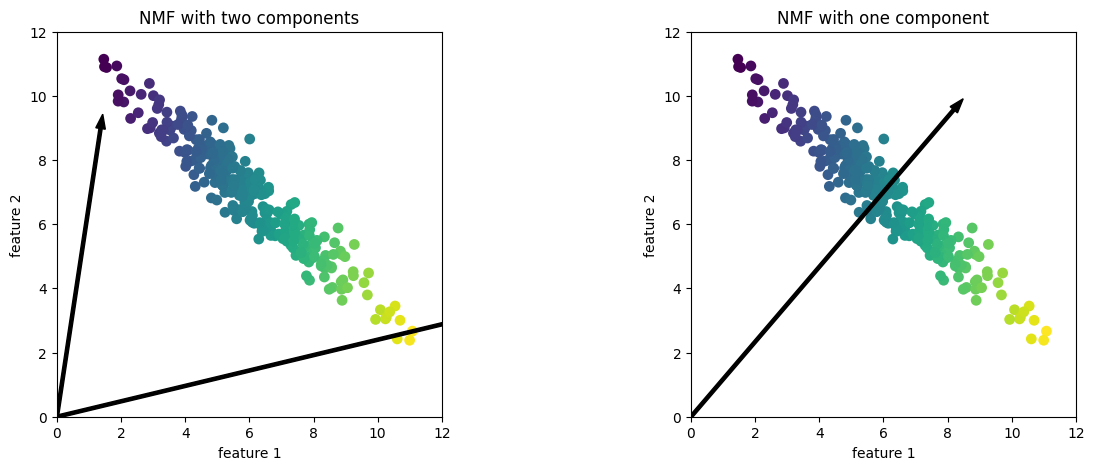

In [18]:
#Plot the illustration of NMF
mglearn.plots.plot_nmf_illustration()

In [19]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
#Bush appears 530 times, while Colin Powell appears 236 times
# only take up to 50 images of each person, otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


/home/klaus/Repositories/Machine-Learning-Examples/venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


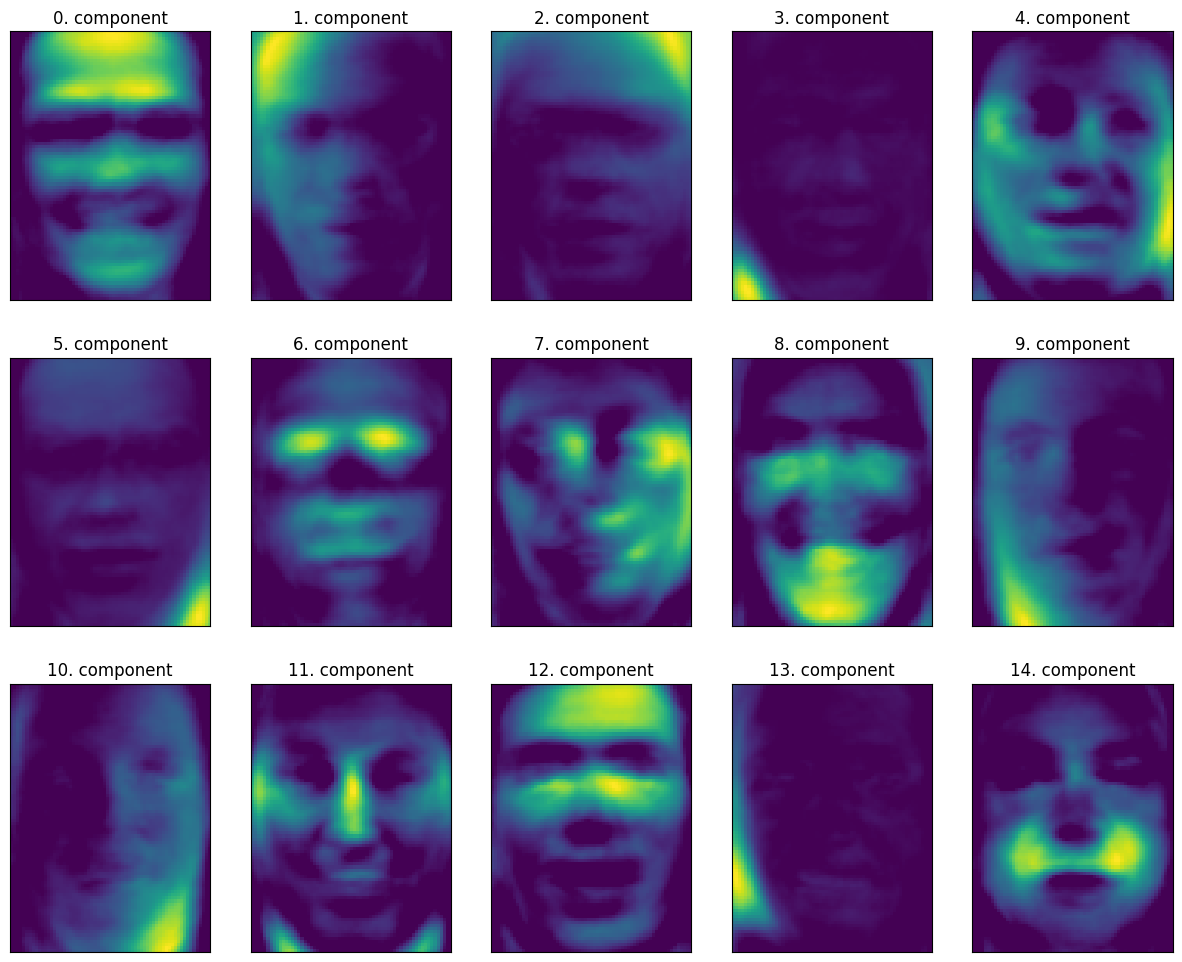

In [20]:
#The components found by NMF on the faces dataset when using 15 components
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

These components are all positive, and so resemble prototypes of faces much more so than the components shown for PCA. For example, one can clearly see that component 3 shows a face rotated somewhat to the right, while component 7 shows a face somewhat rotated to the left. Below Let’s look at the images for which these components are particularly strong

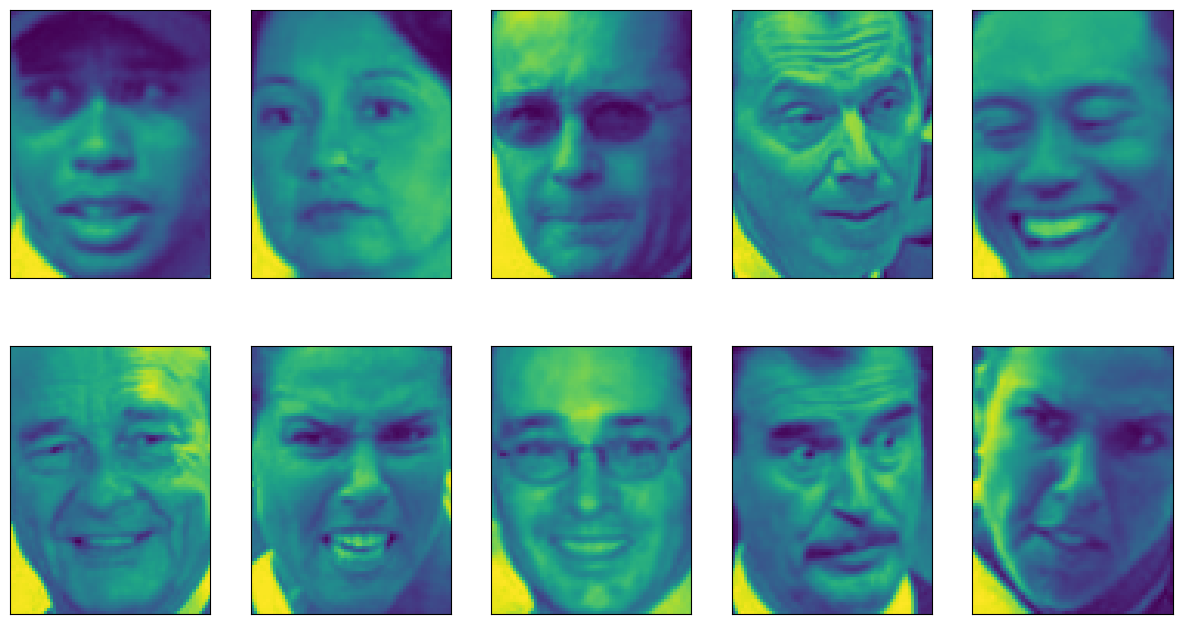

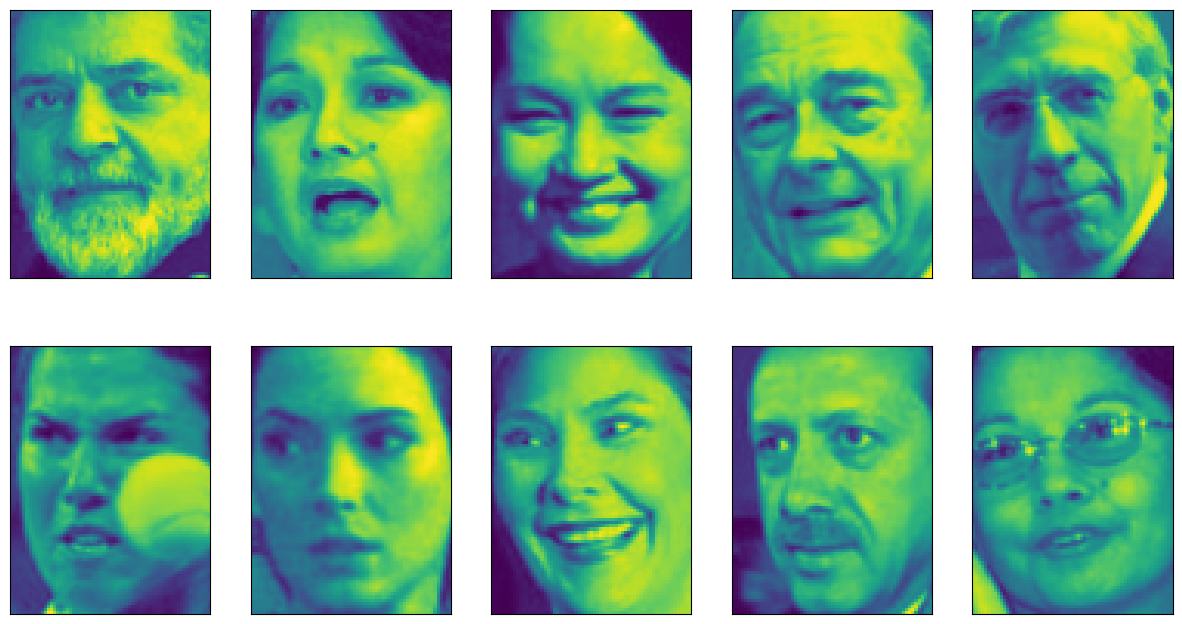

In [21]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

As expected, faces that have a high coefficient for component 3 are faces looking to the right, while faces with a high coefficient for component 7 are looking to the left. Extracting patterns like these works best for data with additive structure, including audio, gene expression, and text data.

Text(0, 0.5, 'Signal')

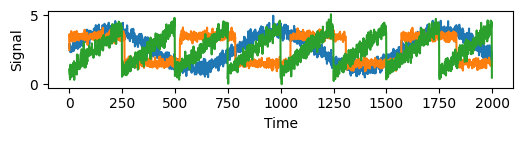

In [22]:
#Signal that is a combination of three different sources
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [23]:
# Unfortunately we cannot observe the original signals, but only an additive mixture of
# all three of them. We want to recover the decomposition of the mixed signal into the
# original components. We assume that we have many different ways to observe the
# mixture (say 100 measurement devices), each of which provides us with a series of
# measurements:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [24]:
#We can use NMF to recover the three signals:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


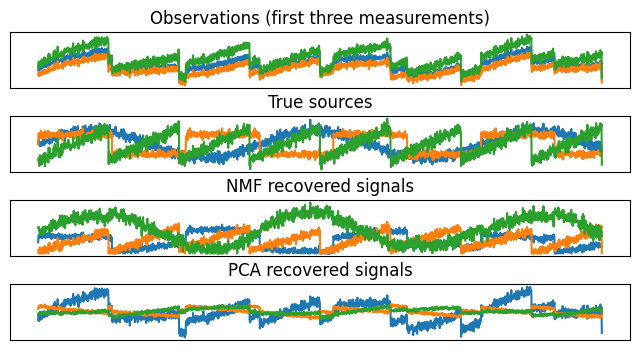

In [25]:
from sklearn.decomposition import PCA
#to compare lets use PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)
models = [X, S, S_, H]
names = ['Observations (first three measurements)','True sources','NMF recovered signals','PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

The figure includes 3 of the 100 measurements from X for reference. As you can see,NMF did a reasonable job of discovering the original sources, while PCA failed and used the first component to explain the majority of the variation in the data. Keep in mind that the components produced by NMF have no natural ordering. In this example, the ordering of the NMF components is the same as in the original signal (see the shading of the three curves), but this is purely accidental.